# Obtain DT, thickness and error from the raw data csv files


## Key imports

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from numpy import array
import matplotlib.lines as mlines
from itertools import islice
import csv
import pandas as pd
import math
import glob
import re

## Get file list

In [52]:
path = "/Users/wei/Documents/Max_lab/AlCF_2020_2/"
files = glob.glob("/Users/wei/Documents/Max_lab/AlCF_2020_2/*csv")

## Read files and make plots

/Users/wei/Documents/Max_lab/AlCF_2020_2/20200925_C38A4_retest.csv
/Users/wei/Documents/Max_lab/AlCF_2020_2/20200924_A38D4_retest.csv
/Users/wei/Documents/Max_lab/AlCF_2020_2/20200926_B38F4_retest.csv
/Users/wei/Documents/Max_lab/AlCF_2020_2/20200922_G38E4_retest.csv
/Users/wei/Documents/Max_lab/AlCF_2020_2/20201015_H38F4_retest2.csv
/Users/wei/Documents/Max_lab/AlCF_2020_2/20201016_H38F4_retest3.csv
/Users/wei/Documents/Max_lab/AlCF_2020_2/20201019_C38A4_retest2.csv
/Users/wei/Documents/Max_lab/AlCF_2020_2/20201001_H38F4_retest.csv
/Users/wei/Documents/Max_lab/AlCF_2020_2/20200923_A72C4_retest.csv
/Users/wei/Documents/Max_lab/AlCF_2020_2/20200921_G38H4_retest.csv
/Users/wei/Documents/Max_lab/AlCF_2020_2/20200928_D38J4_retest.csv
/Users/wei/Documents/Max_lab/AlCF_2020_2/20201005_H38D4_retest.csv
/Users/wei/Documents/Max_lab/AlCF_2020_2/20201007_H38I4_retest.csv
/Users/wei/Documents/Max_lab/AlCF_2020_2/20201021_A72D4_retest.csv
/Users/wei/Documents/Max_lab/AlCF_2020_2/20200930_E38C4_ret

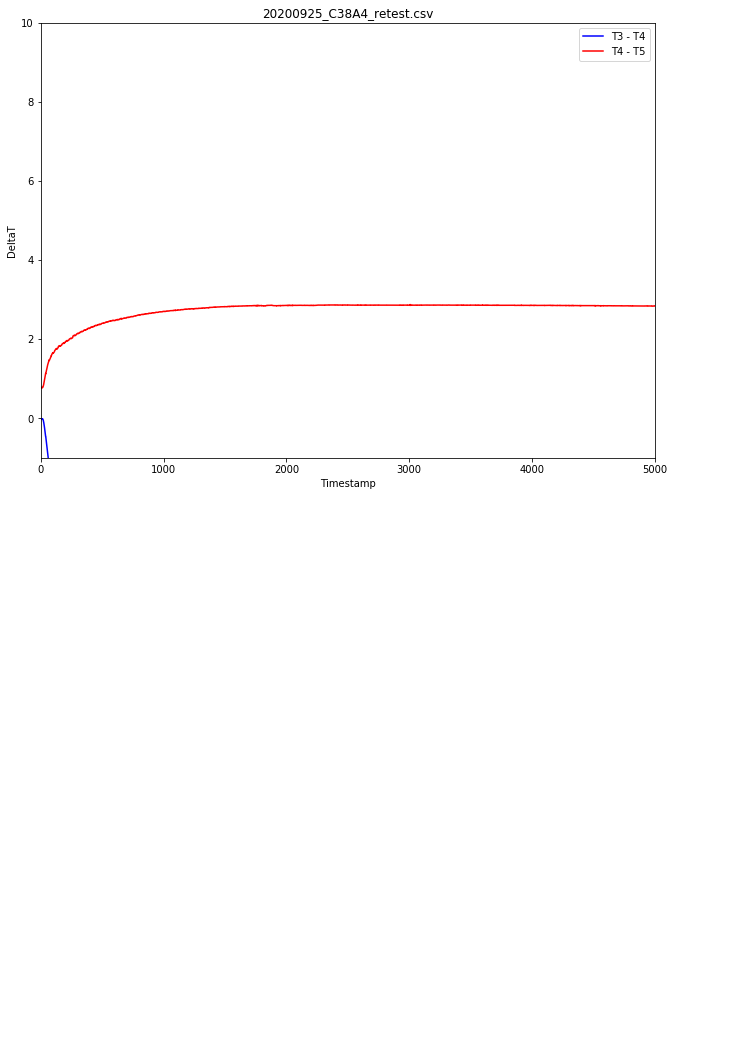

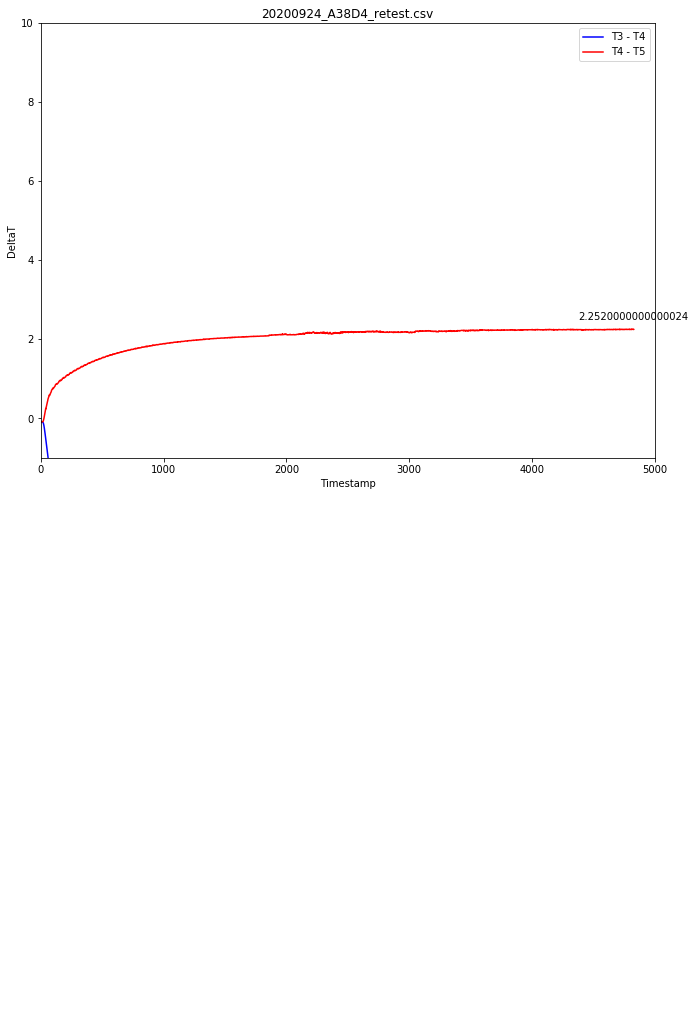

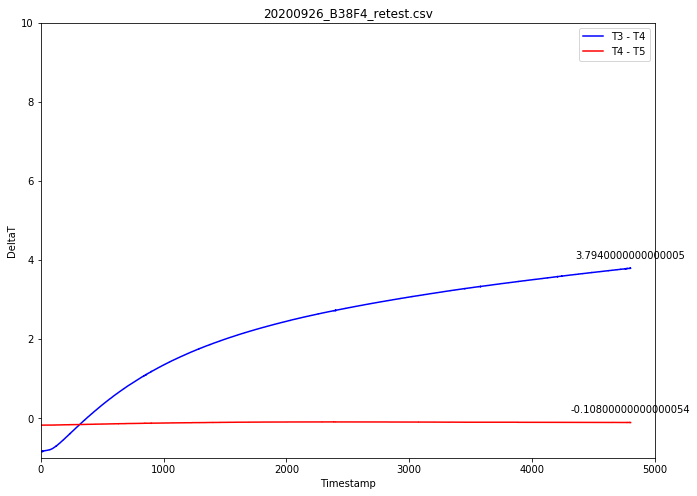

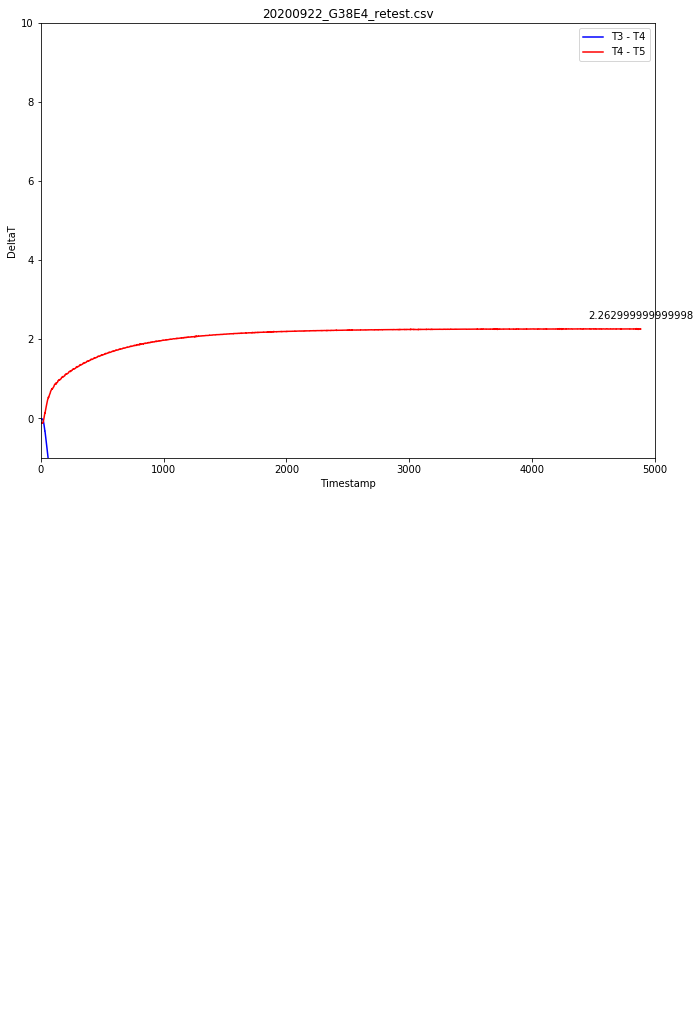

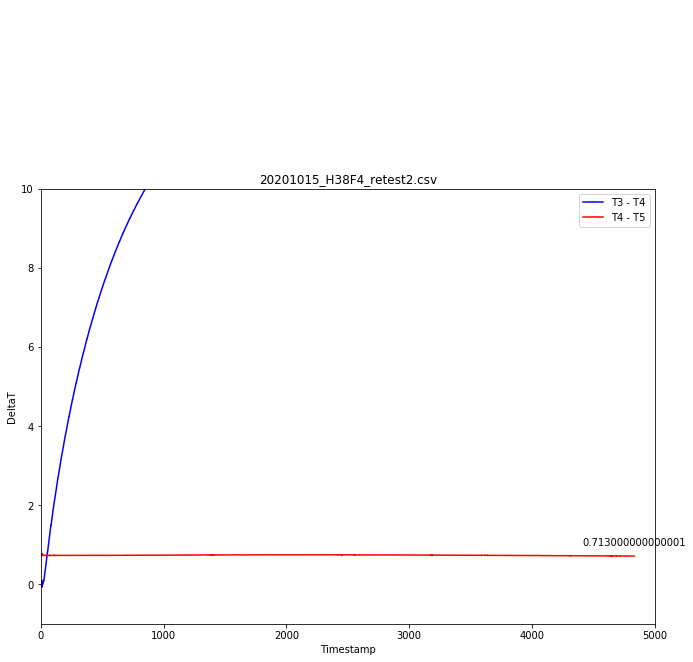

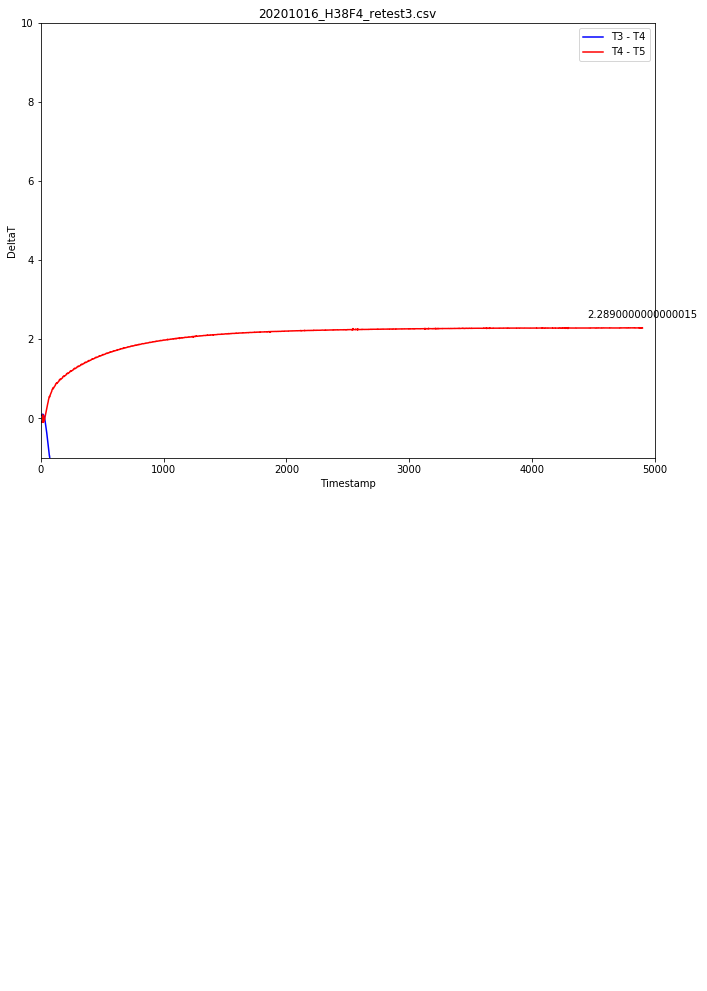

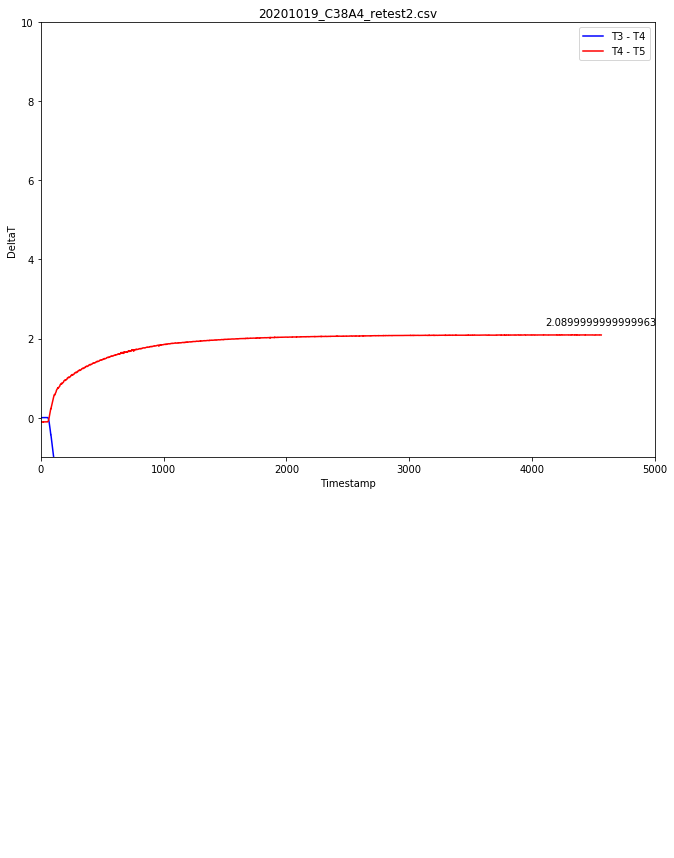

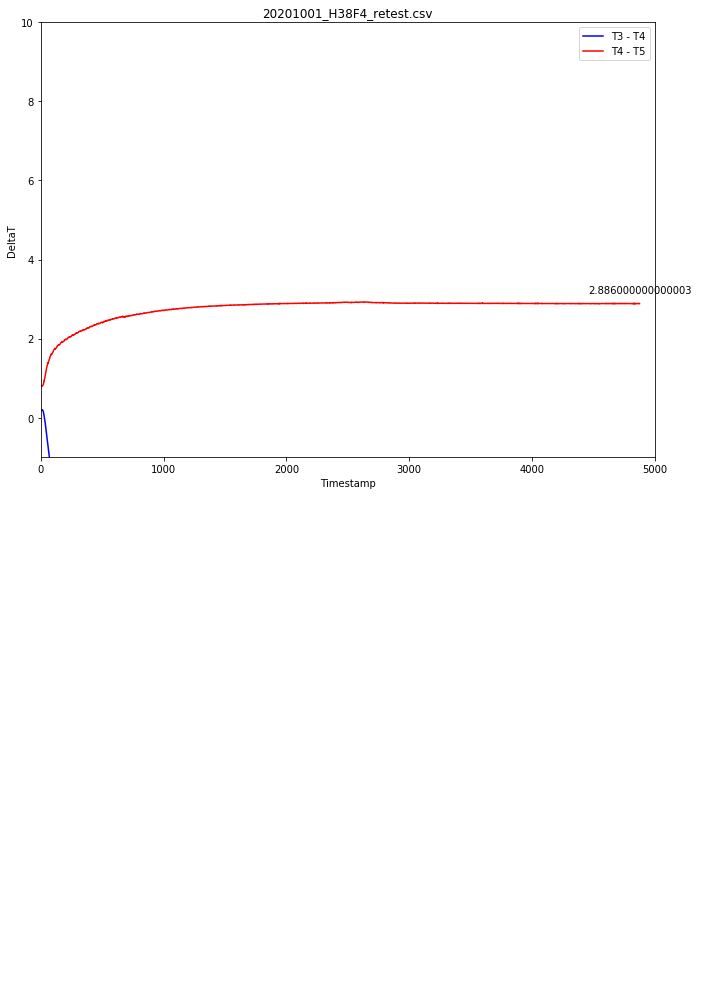

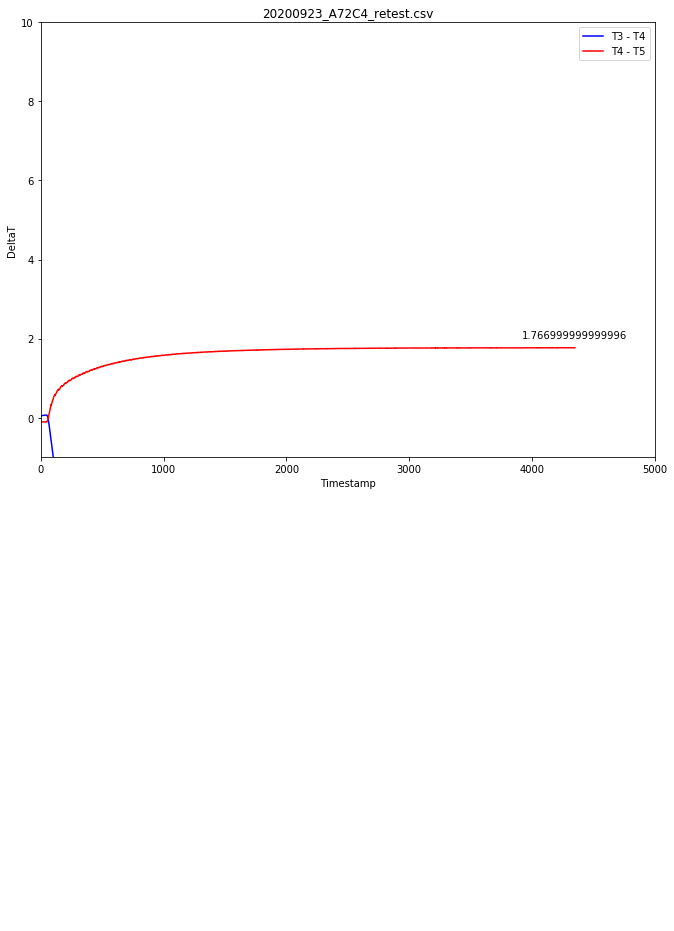

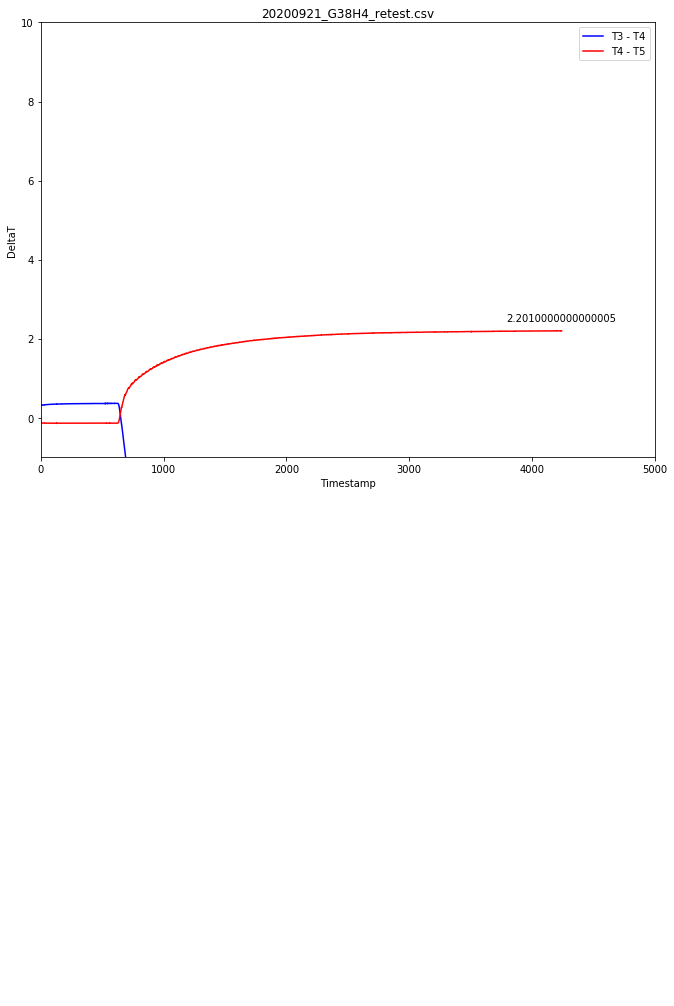

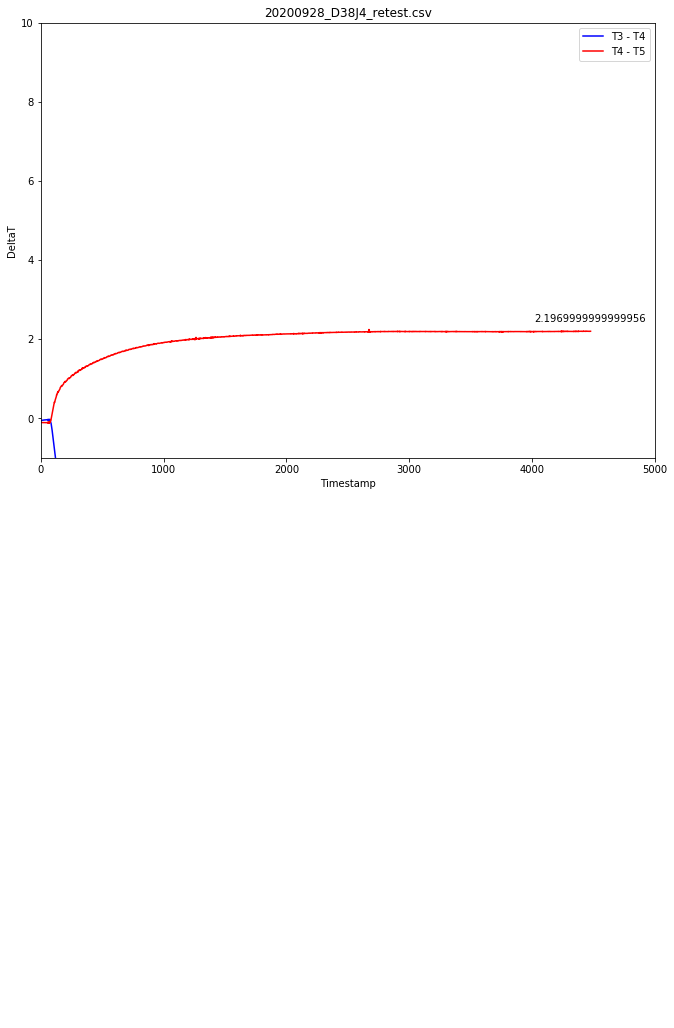

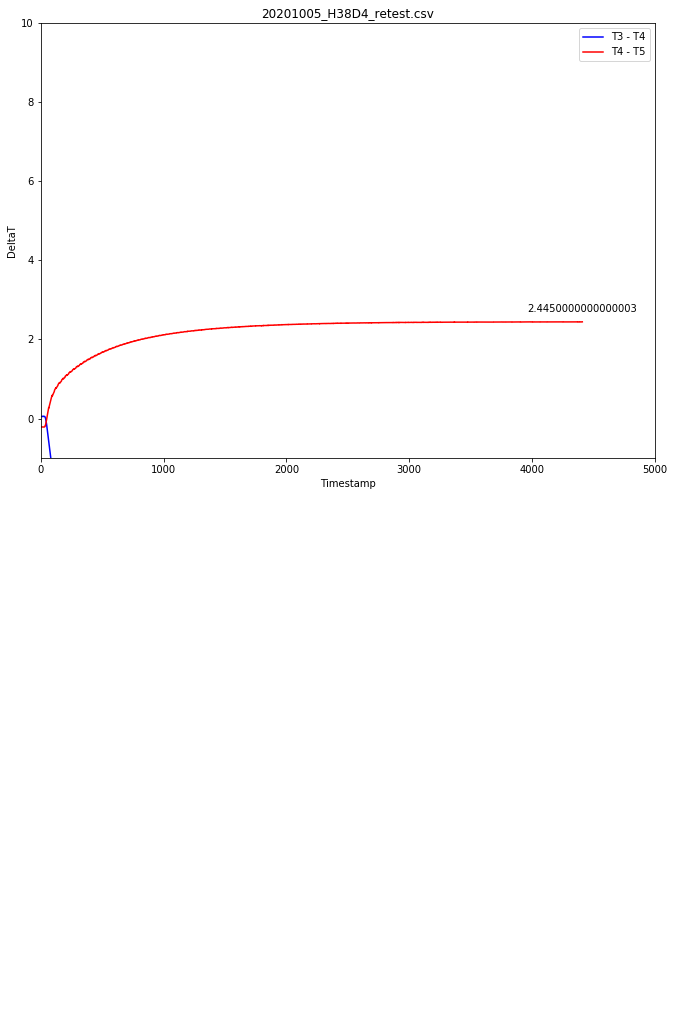

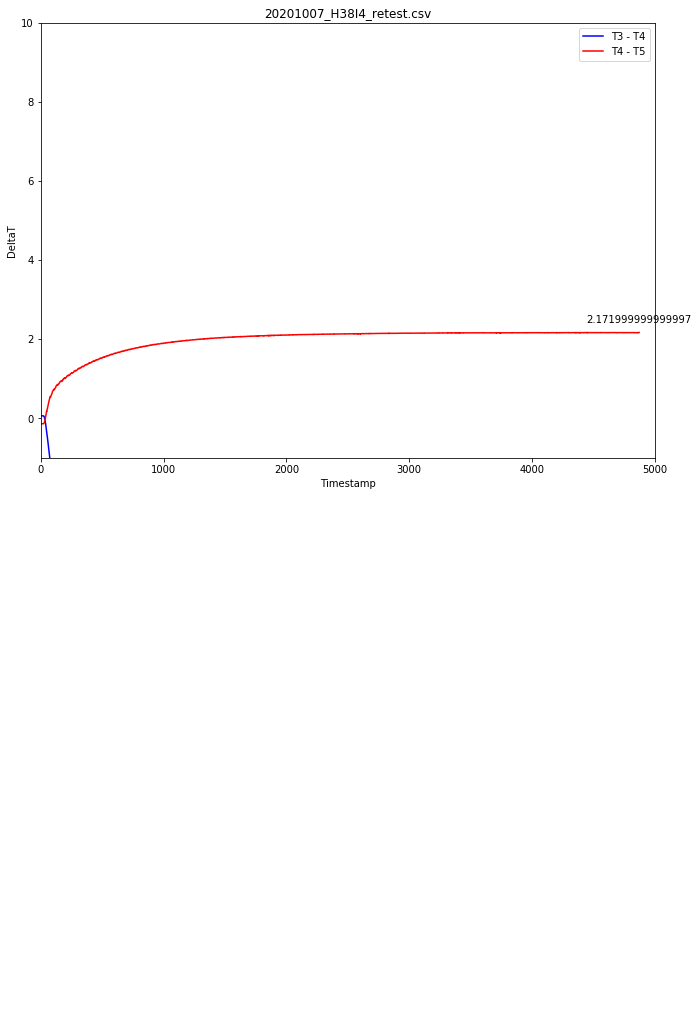

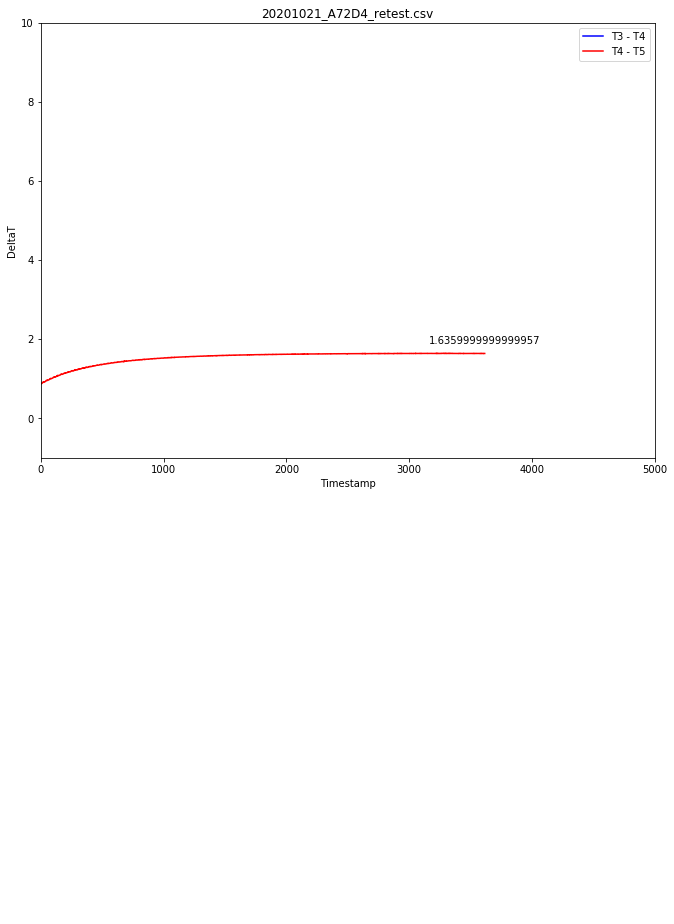

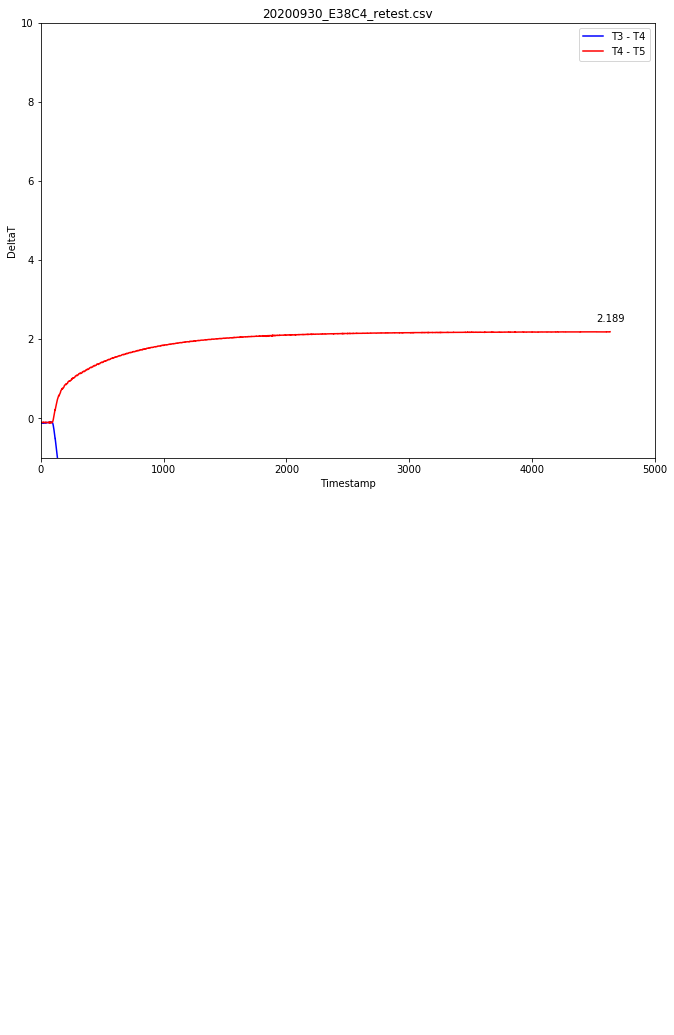

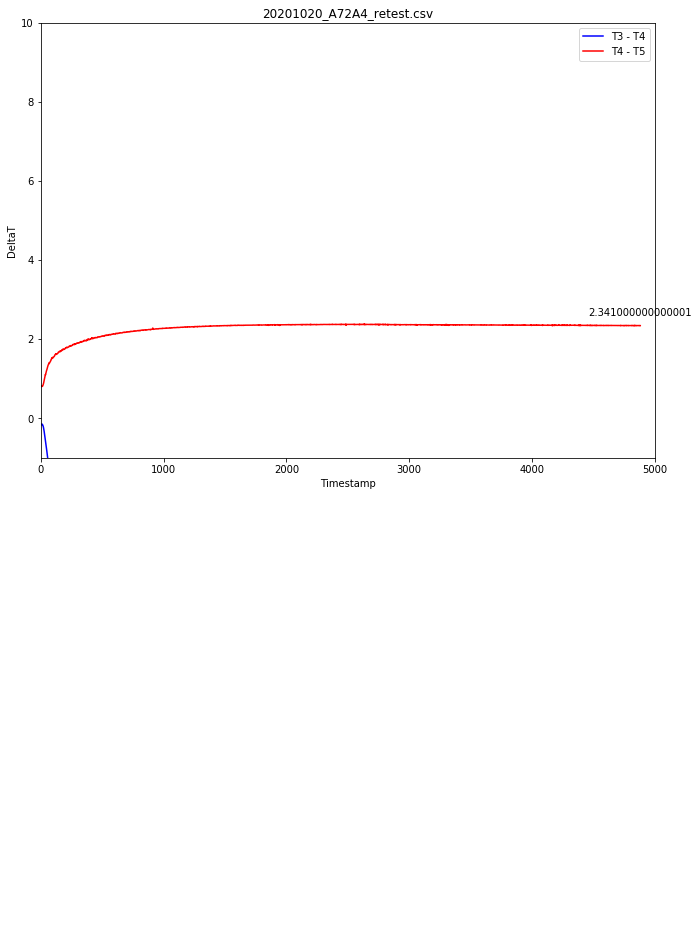

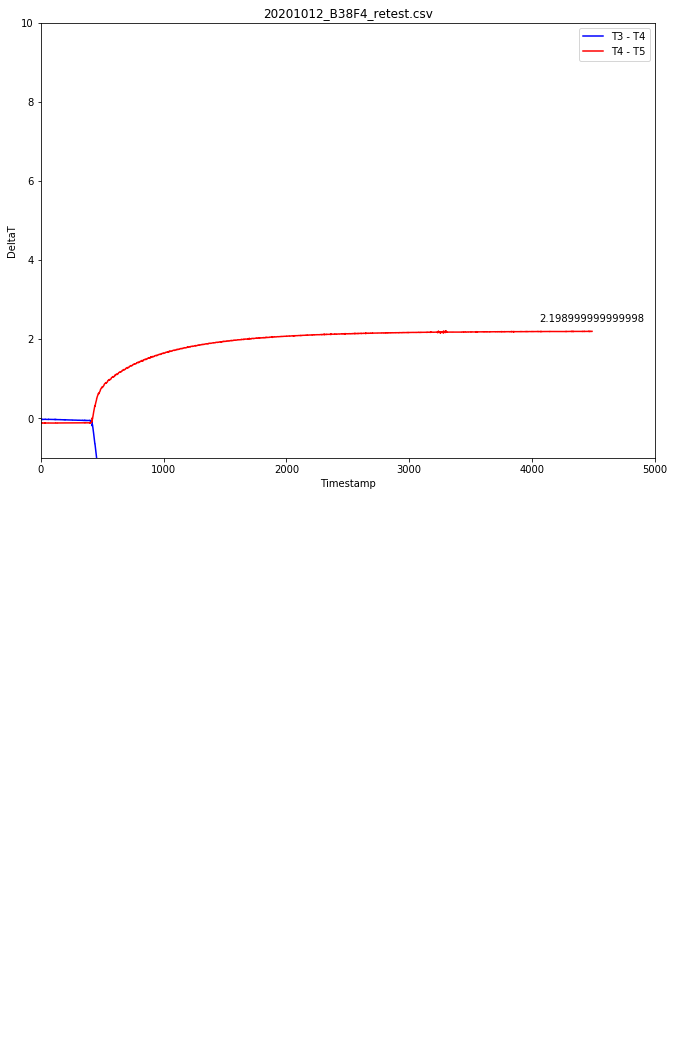

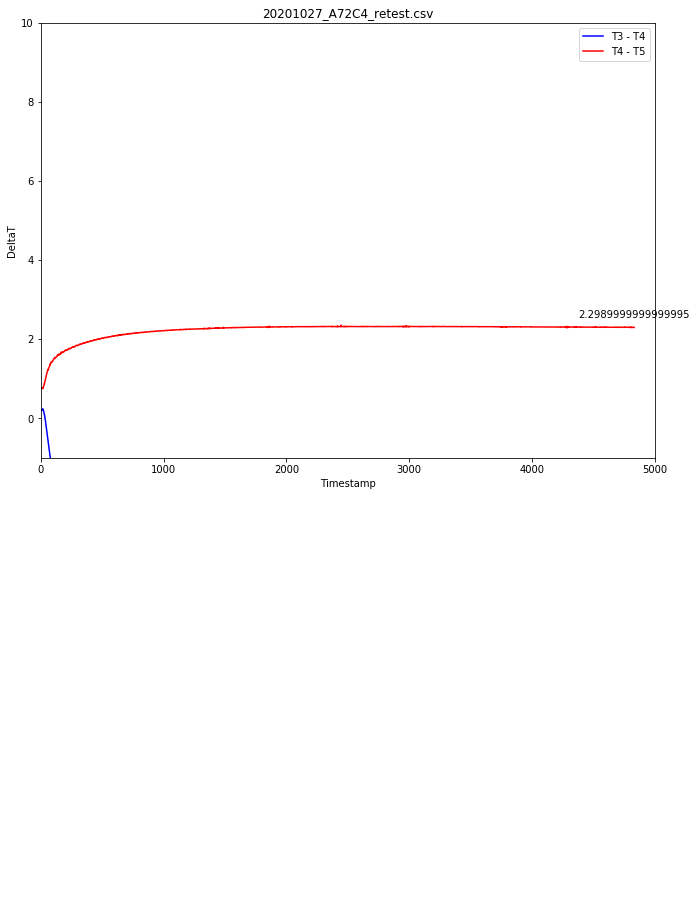

In [54]:
cols1 = ['number', 'time', 'T0', 'T1','T2', 'T3', 'T4', 'T5']
cols2 = ['number', 'time','T3', 'T4', 'T5']
cols3 = ['number', 'time','T0', 'T2', 'T3', 'T4','T5']
cols4 = ['number', 'time','T4', 'T3', 'T5']


x = []
y = []
y_errs = []
for i, file in enumerate(files):
    print(file)

    df = pd.read_csv(file, header=None, names=cols3)
    df_sub = df[['number', 'T3', 'T4', 'T5']].iloc[ 7:] # take only the last 20 min data
    df_sub = df_sub.astype('float')
    
    DT1 = np.array(df_sub['T3'] - df_sub['T4'])
    DT2 = np.array(df_sub['T4'] - df_sub['T5'])
    timestamp = np.array(df_sub['number'])
    
#     plot DT vs timestamp

    fig = plt.figure(figsize=(11,8))
    
    plt.plot(timestamp, DT1, '-b', label='T3 - T4')

    plt.annotate(DT1[-1],(timestamp[-1], DT1[-1]), textcoords="offset points", xytext=(0,10), ha='center')
    plt.annotate(DT2[-1],(timestamp[-1], DT2[-1]), textcoords="offset points", xytext=(0,10), ha='center')

    plt.plot(timestamp, DT2, '-r', label='T4 - T5')

    plt.xlabel('Timestamp')
    plt.ylabel('DeltaT')
    plt.title(file.split('/')[-1])
    plt.ylim(-1,10)
    plt.xlim(0,5000)
    plt.legend()
#     plt.show()
    fig.savefig('{}.png'.format(path + file.split('/')[-1]))

#     obtain data

    DT1 = DT1[(len(df) - 1200) : ]
    DT2 = DT2[(len(df) - 1200) : ]

    y.append(DT1.mean()) 
    y.append(DT2.mean())
    y_errs.append(DT1.std())
    y_errs.append(DT2.std())
    
    thick = re.findall('\d+', (file.split('/')[-1]).split('_')[1]) # get sample thickness from the file name, should be aware of the sample order
    x.append(thick[0])
    x.append(thick[1])

x = np.array(x)
x = x.astype('float')


## Write to a csv file

In [55]:
df = pd.DataFrame({"Thickness" : x, "DeltaT" : y, "Error" : y_errs})
df.to_csv(path+"In_plane.csv", index=False)